# Analysis from ENEM microdata for 2019

## Import libs

In [1]:
import pandas as pd
from apyori import apriori

## Read microdata file

In [2]:
data = pd.read_csv('../microdata/microdata-enem-2019.csv', sep=';', encoding='ISO-8859-1')
data

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,13,M,1,3,1,1,11,1,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,8,M,1,1,1,1,5,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,13,F,1,3,1,1,13,1,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,10,F,1,1,1,1,4,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,7,F,1,1,1,1,4,1,...,B,A,A,B,A,A,C,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095166,190006074437,2019,14,F,4,3,1,1,13,1,...,B,A,A,B,A,A,B,B,A,B
5095167,190005429225,2019,5,M,1,3,1,1,3,1,...,A,A,A,B,B,A,E,A,A,B
5095168,190006087652,2019,6,M,0,0,1,1,3,1,...,A,A,A,B,A,A,C,B,B,B
5095169,190006087653,2019,7,M,0,0,1,1,3,1,...,B,A,A,C,B,B,A,A,A,B


## Select only columns of interest

In [3]:
interest_columns = [
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_FAIXA_ETARIA',
    'TP_ST_CONCLUSAO',
    'TP_ESCOLA',
    'TP_DEPENDENCIA_ADM_ESC',
    'SG_UF_PROVA',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO',
    'Q001',
    'Q002',
    'Q006',
    'Q022',
    'Q024',
    'Q025'
]

interest_data = data[interest_columns]

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025
0,M,1,3,13,1,1,NaN,SP,NaN,NaN,NaN,NaN,NaN,B,B,A,C,C,B
1,M,1,1,8,1,1,NaN,BA,NaN,NaN,NaN,NaN,NaN,C,E,C,E,A,B
2,F,1,3,13,1,1,NaN,CE,NaN,NaN,NaN,NaN,NaN,E,E,B,C,A,B
3,F,1,1,10,1,1,NaN,TO,483.8,503.6,537.3,392.0,460.0,C,E,E,D,B,B
4,F,1,1,7,1,1,NaN,MG,513.6,575.5,570.7,677.0,860.0,E,E,G,C,B,B


### Check count for valid values

In [4]:
interest_data.count()

TP_SEXO                   5095171
TP_ESTADO_CIVIL           5095171
TP_COR_RACA               5095171
TP_FAIXA_ETARIA           5095171
TP_ST_CONCLUSAO           5095171
TP_ESCOLA                 5095171
TP_DEPENDENCIA_ADM_ESC    1147387
SG_UF_PROVA               5095171
NU_NOTA_CN                3710335
NU_NOTA_CH                3923046
NU_NOTA_LC                3923046
NU_NOTA_MT                3710335
NU_NOTA_REDACAO           3923045
Q001                      5095171
Q002                      5095171
Q006                      5095171
Q022                      5095171
Q024                      5095171
Q025                      5095171
dtype: int64

## Translate some columns to better readability

In [5]:
%run '../scripts/attribute-dictionary.py'

interest_data = interest_data.fillna(value = {"TP_DEPENDENCIA_ADM_ESC": 0})
interest_data = interest_data.replace(dictionary_params)

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025
0,Masculino,Solteiro(a),Pardo,Entre 36 e 40 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,NaN,NaN,NaN,NaN,NaN,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa
1,Masculino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,NaN,NaN,NaN,NaN,NaN,Pai Fundamental II incompleto,Mãe Ensino médio completo,Classe Social E,Tem celular,Não tem computador,Tem internet em casa
2,Feminino,Solteiro(a),Pardo,Entre 36 e 40 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,NaN,NaN,NaN,NaN,NaN,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social E,Tem celular,Não tem computador,Tem internet em casa
3,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Norte,483.8,503.6,537.3,392.0,460.0,Pai Fundamental II incompleto,Mãe Ensino médio completo,Classe Social E,Tem celular,Tem computador,Tem internet em casa
4,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,513.6,575.5,570.7,677.0,860.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social D,Tem celular,Tem computador,Tem internet em casa


## Remove nil values and creates a new column with the arithmetic average of the grades

In [6]:
interest_data = interest_data.query("NU_NOTA_CN.notnull() and NU_NOTA_CH.notnull() and NU_NOTA_LC.notnull() and NU_NOTA_MT.notnull() and NU_NOTA_REDACAO.notnull() and TP_ESTADO_CIVIL.notnull() and Q006.notnull() and Q022.notnull() and Q024.notnull() and Q025.notnull()")
interest_data["NU_NOTA_GERAL"] = interest_data[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025,NU_NOTA_GERAL
3,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Norte,483.8,503.6,537.3,392.0,460.0,Pai Fundamental II incompleto,Mãe Ensino médio completo,Classe Social E,Tem celular,Tem computador,Tem internet em casa,475.34
4,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,513.6,575.5,570.7,677.0,860.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social D,Tem celular,Tem computador,Tem internet em casa,639.36
5,Masculino,Casado(a) ou mora com companheiro(a),Preto,Entre 36 e 40 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Centro-Oeste,563.7,644.9,564.2,675.3,800.0,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa,649.62
6,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,484.6,488.4,507.2,594.7,600.0,Pai Ensino médio completo,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Não tem computador,Não tem internet em casa,534.98
9,Masculino,Solteiro(a),Branco,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Dependencia administrativa nao informada,Região Sudeste,543.9,548.1,502.5,480.7,400.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social D,Tem celular,Tem computador,Tem internet em casa,495.04


### Check count for valid values

In [7]:
interest_data.count()

TP_SEXO                   3701909
TP_ESTADO_CIVIL           3701909
TP_COR_RACA               3701909
TP_FAIXA_ETARIA           3701909
TP_ST_CONCLUSAO           3701909
TP_ESCOLA                 3701909
TP_DEPENDENCIA_ADM_ESC    3701909
SG_UF_PROVA               3701909
NU_NOTA_CN                3701909
NU_NOTA_CH                3701909
NU_NOTA_LC                3701909
NU_NOTA_MT                3701909
NU_NOTA_REDACAO           3701909
Q001                      3701909
Q002                      3701909
Q006                      3701909
Q022                      3701909
Q024                      3701909
Q025                      3701909
NU_NOTA_GERAL             3701909
dtype: int64

## Calculate Z-SCORE from NU_NOTA_GERAL

In [8]:
from scipy.stats import zscore

interest_data["Z_SCORE_NOTA"] = zscore(interest_data["NU_NOTA_GERAL"])
interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,...,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025,NU_NOTA_GERAL,Z_SCORE_NOTA
3,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Norte,483.8,503.6,...,392.0,460.0,Pai Fundamental II incompleto,Mãe Ensino médio completo,Classe Social E,Tem celular,Tem computador,Tem internet em casa,475.34,-0.565242
4,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,513.6,575.5,...,677.0,860.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social D,Tem celular,Tem computador,Tem internet em casa,639.36,1.395478
5,Masculino,Casado(a) ou mora com companheiro(a),Preto,Entre 36 e 40 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Centro-Oeste,563.7,644.9,...,675.3,800.0,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa,649.62,1.518128
6,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,484.6,488.4,...,594.7,600.0,Pai Ensino médio completo,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Não tem computador,Não tem internet em casa,534.98,0.147703
9,Masculino,Solteiro(a),Branco,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Dependencia administrativa nao informada,Região Sudeste,543.9,548.1,...,480.7,400.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social D,Tem celular,Tem computador,Tem internet em casa,495.04,-0.329745


### Z-SCORE mínimo

In [9]:
interest_data["Z_SCORE_NOTA"].min()

-6.247529969655593

### Z-SCORE máximo

In [10]:
interest_data["Z_SCORE_NOTA"].max()

3.9233034794531

## Create a label for grade based on z-score

In [11]:
NOTA_GERAL_LABELS = [
  "NOTA: MUITO ABAIXO DA MÉDIA",
  "NOTA: ABAIXO DA MÉDIA",
  "NOTA: MÉDIA",
  "NOTA: ACIMA DA MÉDIA",
  "NOTA: MUITO ACIMA DA MÉDIA",
]

interest_data["CLASSIFICACAO_NOTA"] = pd.cut(interest_data["Z_SCORE_NOTA"], bins=[-10, -2, -1, 1, 2, 10], labels=NOTA_GERAL_LABELS)

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025,NU_NOTA_GERAL,Z_SCORE_NOTA,CLASSIFICACAO_NOTA
3,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Norte,483.8,503.6,...,460.0,Pai Fundamental II incompleto,Mãe Ensino médio completo,Classe Social E,Tem celular,Tem computador,Tem internet em casa,475.34,-0.565242,NOTA: MÉDIA
4,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,513.6,575.5,...,860.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social D,Tem celular,Tem computador,Tem internet em casa,639.36,1.395478,NOTA: ACIMA DA MÉDIA
5,Masculino,Casado(a) ou mora com companheiro(a),Preto,Entre 36 e 40 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Centro-Oeste,563.7,644.9,...,800.0,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa,649.62,1.518128,NOTA: ACIMA DA MÉDIA
6,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,484.6,488.4,...,600.0,Pai Ensino médio completo,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Não tem computador,Não tem internet em casa,534.98,0.147703,NOTA: MÉDIA
9,Masculino,Solteiro(a),Branco,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Dependencia administrativa nao informada,Região Sudeste,543.9,548.1,...,400.0,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social D,Tem celular,Tem computador,Tem internet em casa,495.04,-0.329745,NOTA: MÉDIA


## Check for uniqueness of all values to check if all of them was translated

In [12]:
interest_data['TP_SEXO'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [13]:
interest_data['TP_ESTADO_CIVIL'].unique()

array(['Solteiro(a)', 'Casado(a) ou mora com companheiro(a)',
       'Divorciado(a)/Desquitado(a)/Separado(a)',
       'Estado civil: Não informado', 'Viúvo(a)'], dtype=object)

In [14]:
interest_data['TP_COR_RACA'].unique()

array(['Branco', 'Preto', 'Pardo', 'Amarelo', 'Indígena',
       'Cor/Raça Não Declarado'], dtype=object)

In [15]:
interest_data['TP_FAIXA_ETARIA'].unique()

array(['Entre 17 e 25 anos', 'Entre 36 e 40 anos', 'Entre 26 e 30 anos',
       'Entre 41 e 45 anos', 'Entre 46 e 50 anos', 'Entre 31 e 35 anos',
       'Entre 51 e 55 anos', 'Entre 56 e 60 anos', 'Menor de 17 anos',
       'Entre 61 e 65 anos', 'Entre 66 e 70 anos', 'Maior de 70 anos'],
      dtype=object)

In [16]:
interest_data['TP_ST_CONCLUSAO'].unique()

array(['Já concluí o Ensino Médio',
       'Estou cursando e concluirei o Ensino este ano',
       'Estou cursando e concluirei o Ensino Médio após este ano',
       'Não concluí e não estou cursando o Ensino Médio'], dtype=object)

In [17]:
interest_data['TP_ESCOLA'].unique()

array(['Não Respondeu', 'Pública', 'Privada'], dtype=object)

In [18]:
interest_data['TP_DEPENDENCIA_ADM_ESC'].unique()

array(['Dependencia administrativa nao informada', 'Privada', 'Estadual',
       'Federal', 'Municipal'], dtype=object)

In [19]:
interest_data['SG_UF_PROVA'].unique()

array(['Região Norte', 'Região Sudeste', 'Região Centro-Oeste',
       'Região Nordeste', 'Região Sul'], dtype=object)

In [20]:
interest_data['Q001'].unique()

array(['Pai Fundamental II incompleto', 'Pai Ensino médio completo',
       'Pai Fundamental I incompleto', 'Pai Ensino médio incompleto',
       'Não sei a escolaridade do meu pai', 'Pai Graduação completa',
       'Pai nunca estudou', 'Pai Pós-graduação completa'], dtype=object)

In [21]:
interest_data['Q002'].unique()

array(['Mãe Ensino médio completo', 'Mãe Fundamental I incompleto',
       'Mãe Fundamental II incompleto', 'Mãe Ensino médio incompleto',
       'Não sei a escolaridade da minha mãe', 'Mãe Graduação completa',
       'Mãe nunca estudou', 'Mãe Pós-graduação completa'], dtype=object)

In [22]:
interest_data['Q006'].unique()

array(['Classe Social E', 'Classe Social D', 'Classe Social C',
       'Classe Social B', 'Classe Social A'], dtype=object)

In [23]:
interest_data['Q022'].unique()

array(['Tem celular', 'Não tem celular'], dtype=object)

In [24]:
interest_data['Q024'].unique()

array(['Tem computador', 'Não tem computador'], dtype=object)

In [25]:
interest_data['Q025'].unique()

array(['Tem internet em casa', 'Não tem internet em casa'], dtype=object)

In [26]:
interest_data['CLASSIFICACAO_NOTA'].unique()

['NOTA: MÉDIA', 'NOTA: ACIMA DA MÉDIA', 'NOTA: ABAIXO DA MÉDIA', 'NOTA: MUITO ACIMA DA MÉDIA', 'NOTA: MUITO ABAIXO DA MÉDIA']
Categories (5, object): ['NOTA: MUITO ABAIXO DA MÉDIA' < 'NOTA: ABAIXO DA MÉDIA' < 'NOTA: MÉDIA' < 'NOTA: ACIMA DA MÉDIA' < 'NOTA: MUITO ACIMA DA MÉDIA']

## Generate histograms by grade z-score

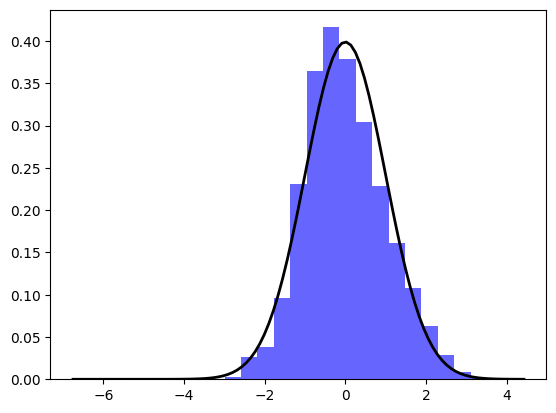

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

data = interest_data['Z_SCORE_NOTA'].to_numpy()

mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

## Generate histograms by grade

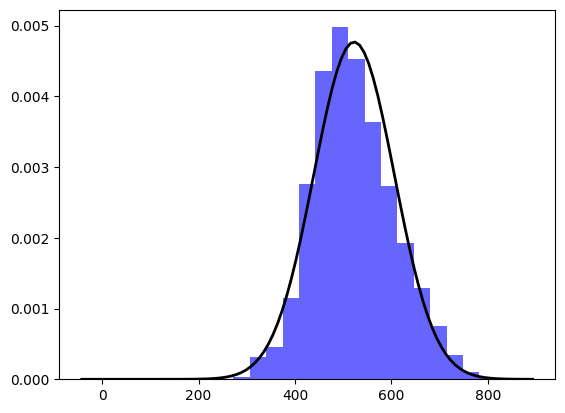

In [28]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

data = interest_data['NU_NOTA_GERAL'].to_numpy()

mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

## Filter by grades far above or far below average

In [29]:
filtered_interest_data = interest_data.query("Z_SCORE_NOTA > 2.00 or Z_SCORE_NOTA < -2.00")
filtered_interest_data.count()

TP_SEXO                   189427
TP_ESTADO_CIVIL           189427
TP_COR_RACA               189427
TP_FAIXA_ETARIA           189427
TP_ST_CONCLUSAO           189427
TP_ESCOLA                 189427
TP_DEPENDENCIA_ADM_ESC    189427
SG_UF_PROVA               189427
NU_NOTA_CN                189427
NU_NOTA_CH                189427
NU_NOTA_LC                189427
NU_NOTA_MT                189427
NU_NOTA_REDACAO           189427
Q001                      189427
Q002                      189427
Q006                      189427
Q022                      189427
Q024                      189427
Q025                      189427
NU_NOTA_GERAL             189427
Z_SCORE_NOTA              189427
CLASSIFICACAO_NOTA        189427
dtype: int64

In [30]:
analysis_interest_columns = [
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_FAIXA_ETARIA',
    'TP_ST_CONCLUSAO',
    'TP_ESCOLA',
    'TP_DEPENDENCIA_ADM_ESC',
    'SG_UF_PROVA',
    'CLASSIFICACAO_NOTA',
    'Q001',
    'Q002',
    'Q006',
    'Q022',
    'Q024',
    'Q025'
]

analysis_interest_data = filtered_interest_data[analysis_interest_columns]

## Save a CSV file with the analysis interest data

In [31]:
import os  

os.makedirs('analysis_interest_data', exist_ok=True)  
analysis_interest_data.to_csv('analysis_interest_data/analysis-interest-data-2019.csv')

analysis_file_data = pd.read_csv('analysis_interest_data/analysis-interest-data-2019.csv', sep=',', encoding='UTF-8')
analysis_file_data.head()

,Unnamed: 0,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,CLASSIFICACAO_NOTA,Q001,Q002,Q006,Q022,Q024,Q025
0,26,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Privada,Privada,Região Sul,NOTA: MUITO ACIMA DA MÉDIA,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social E,Tem celular,Tem computador,Tem internet em casa
1,46,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,NOTA: MUITO ACIMA DA MÉDIA,Pai Graduação completa,Mãe Graduação completa,Classe Social C,Tem celular,Tem computador,Tem internet em casa
2,155,Feminino,Solteiro(a),Cor/Raça Não Declarado,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Federal,Região Sudeste,NOTA: MUITO ACIMA DA MÉDIA,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social E,Tem celular,Tem computador,Tem internet em casa
3,162,Feminino,Estado civil: Não informado,Cor/Raça Não Declarado,Entre 31 e 35 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,NOTA: MUITO ABAIXO DA MÉDIA,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Não tem computador,Tem internet em casa
4,185,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,NOTA: MUITO ACIMA DA MÉDIA,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social D,Tem celular,Tem computador,Tem internet em casa


## Convert table to transactions

In [32]:
transactions = analysis_interest_data.to_numpy()
transactions

array([['Feminino', 'Solteiro(a)', 'Branco', ..., 'Tem celular',
        'Tem computador', 'Tem internet em casa'],
       ['Feminino', 'Solteiro(a)', 'Branco', ..., 'Tem celular',
        'Tem computador', 'Tem internet em casa'],
       ['Feminino', 'Solteiro(a)', 'Cor/Raça Não Declarado', ...,
        'Tem celular', 'Tem computador', 'Tem internet em casa'],
       ...,
       ['Masculino', 'Solteiro(a)', 'Pardo', ..., 'Tem celular',
        'Não tem computador', 'Tem internet em casa'],
       ['Feminino', 'Casado(a) ou mora com companheiro(a)', 'Branco',
        ..., 'Tem celular', 'Tem computador', 'Tem internet em casa'],
       ['Masculino', 'Casado(a) ou mora com companheiro(a)', 'Branco',
        ..., 'Tem celular', 'Tem computador', 'Tem internet em casa']],
      dtype=object)

## Create apriori rules

In [33]:
%run '../scripts/apriori-params-setup.py'
rules = apriori(transactions, min_support=support, min_confidence=confidence)
rules

<generator object apriori at 0x12153b900>

## Run apriori

In [34]:
from datetime import datetime

initial_time = datetime.now()

results = pd.DataFrame(list(rules))

execution_time = datetime.now() - initial_time
print("Time to run apriori: " + str(execution_time))

Time to run apriori: 1:42:55.585358


In [35]:
results

,items,support,ordered_statistics
0,(Dependencia administrativa nao informada),0.713842,"[((), (Dependencia administrativa nao informad..."
1,(Entre 17 e 25 anos),0.813179,"[((), (Entre 17 e 25 anos), 0.8131786915276069..."
2,(Feminino),0.537954,"[((), (Feminino), 0.5379539347611481, 1.0)]"
3,(Já concluí o Ensino Médio),0.528198,"[((), (Já concluí o Ensino Médio), 0.528198197..."
4,(NOTA: MUITO ACIMA DA MÉDIA),0.644401,"[((), (NOTA: MUITO ACIMA DA MÉDIA), 0.64440127..."
...,...,...,...
10003,"(Tem computador, Já concluí o Ensino Médio, NO...",0.173893,"[((Feminino, Já concluí o Ensino Médio), (Tem ..."
10004,"(Tem computador, Já concluí o Ensino Médio, Ma...",0.129190,"[((Já concluí o Ensino Médio, Masculino), (Tem..."
10005,"(Tem computador, Já concluí o Ensino Médio, Re...",0.153341,"[((Região Sudeste, Dependencia administrativa ..."
10006,"(Branco, Tem computador, Já concluí o Ensino M...",0.114535,"[((Feminino, Branco, Dependencia administrativ..."


## Extract results to a new table

In [36]:
from datetime import datetime

initial_time = datetime.now()

%run '../scripts/extractor.py'

organized_rules = extractor(results)

execution_time = datetime.now() - initial_time
print("Time to run extractor: " + str(execution_time))

organized_rules

Time to run extractor: 0:00:00.001790


,items_base,items_add,support,confidence,lift
0,[],[Dependencia administrativa nao informada],0.713842,0.713842,1.000000
1,[],[Entre 17 e 25 anos],0.813179,0.813179,1.000000
2,[],[Feminino],0.537954,0.537954,1.000000
3,[],[Já concluí o Ensino Médio],0.528198,0.528198,1.000000
4,[],[NOTA: MUITO ACIMA DA MÉDIA],0.644401,0.644401,1.000000
...,...,...,...,...,...
291861,"[Branco, Tem computador, Já concluí o Ensino M...",[NOTA: MUITO ACIMA DA MÉDIA],0.110686,0.978440,1.518371
291862,"[Branco, Tem computador, Região Sudeste, NOTA:...",[Já concluí o Ensino Médio],0.110686,0.944119,1.787434
291863,"[Branco, Tem computador, Já concluí o Ensino M...",[Entre 17 e 25 anos],0.110686,0.942464,1.158988
291864,"[Branco, Tem computador, Já concluí o Ensino M...",[Dependencia administrativa nao informada],0.110686,1.000000,1.400870


In [37]:
rules_count = len(organized_rules.index)
print("Count of itemsets: " + str(len(results.index)))
print("Count of association rules for support " + str((support *100)) + "% and confidence " + str((confidence * 100)) + "%: " + str(rules_count))

Count of itemsets: 10008
Count of association rules for support 10.0% and confidence 50.0%: 291866


## Save results to a new CSV file

In [38]:
import os  

os.makedirs('results', exist_ok=True)  
organized_rules.to_csv('results/organized-associations-2019.csv')  